### class 분류
#### 하루 주가 변동 분류
  - 1: 오전 max 오전 min, 2: 오전 max 오후 min, 3: 오전 min, 오후 max, 4: 오후 man,  오후 min

In [1]:
import datetime, time
from datetime import date

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

In [2]:
def read_pickle(com_name, date_range_ts):
    class_val = []
    for f_date in date_range_ts :
        f_name = '{}/{}_10min_price_{}.pkl'.format(pkl_directory, com_name, f_date.strftime('%Y%m%d'))
        try : 
            df = pd.read_pickle(f_name)
            print("1", end=' ')
            class_num = classify_into_4(df)
            print("2", end=' ')
            d_c_temp = [f_date.strftime('%Y-%m-%d'), class_num]
            print("3", end=' ')
            class_val.append(d_c_temp)
            print("4")
        except :
            print("except date---", f_name)
            continue
    return class_val

In [3]:
def classify_into_4(df):
    df_new = df[(df['time'].astype(str) > '09:00:00') & (df['time'].astype(str) < '15:30:00')]
    #  9시 30분(미포함) 이전 제외, 오후 3시 30분(포함) 이후 제외 후 최고가 시간, 최저가 시간 비교
#     df_c = df_new['time'].astype(str).copy() #timestampe에서 str로 변환 (크기 비교를 하기 위하여)
#     df_new['time'] =  df_c
    time_max = str(df_new[df_new['price'] == df_new['price'].max()]['time'].iloc[0]) # str() change datetime.time to string
    time_min = str(df_new[df_new['price'] == df_new['price'].min()]['time'].iloc[0])
    time_criteria = '12:00:00'
    if (time_max <= time_criteria) & (time_min <= time_criteria):
        class_num = 1
    elif (time_max <= time_criteria) & (time_min >= time_criteria):
        class_num = 2
    elif (time_max >= time_criteria) & (time_min <= time_criteria):
        class_num = 3
    elif (time_max >= time_criteria) & (time_min >= time_criteria):
        class_num = 4
    # : 오전 max 오전 min, 2: 오전 max 오후 min, 3: 오전 min, 오후 max, 4: 오후 man,  오후 min
    return class_num

In [5]:
code = {'005930': ['삼성전자', 'sec'], '005380': ['현대차', 'hyunmotor'],
                 '035420': ['NAVER', 'naver'], '033780': ['KT&G', 'ktng']}
# code = {'005930': ['삼성전자', 'sec']}

In [6]:
start_date = '20220620'
end_date = datetime.date.today() - datetime.timedelta(days = 1) # 오늘날짜 하루전까지
date_range_ts = pd.date_range(start=start_date, end=end_date)
pkl_directory = '../data/company_daily_price_pkl'

In [25]:
for key, val in code.items():
    class_val = read_pickle(val[1], date_range_ts)
    df = pd.DataFrame(class_val)
    df.columns = ['date', 'value']
    df.to_pickle(val[1]+'.pkl')

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220625.pkl
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220626.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220702.pkl
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220703.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220709.pkl
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220710.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220716.pkl
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220717.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220723.pkl
except date--- ../data/company_daily_price_pkl/sec_10min_price_20220724.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4


1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220625.pkl
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220626.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220702.pkl
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220703.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220709.pkl
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220710.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220716.pkl
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220717.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220723.pkl
except date--- ../data/company_daily_price_pkl/naver_10min_price_20220724.pkl
1 2 3 4
1 2 3 4
1 2 3 4
1 2 

In [17]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(df[0], df[1])

In [26]:
df = []
for i, (key, val) in enumerate(code.items()):
    df.append(pd.read_pickle(val[1]+'.pkl'))

In [38]:
df[3]['value'].value_counts()

3    70
2    51
4    21
1    17
Name: value, dtype: int64

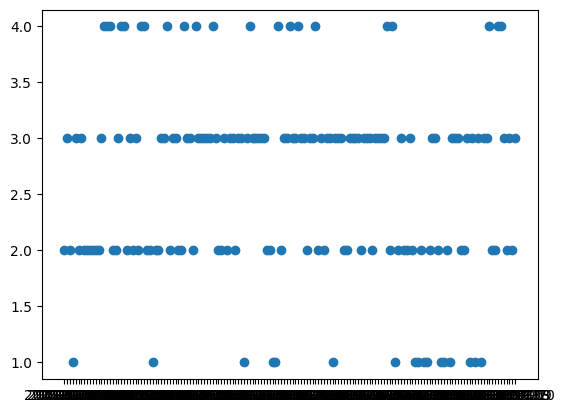

In [40]:
plt.scatter(df[3]['date'], df[3]['value'])

In [27]:
df[1].head()

,date,value
0,2022-06-20,4
1,2022-06-21,2
2,2022-06-22,1
3,2022-06-23,2
4,2022-06-24,1


In [ ]:
fname = '../data/company_daily_price_pkl/sec_10min_price_20230207.pkl'
df = pd.read_pickle(fname)

In [ ]:
df.tail()

In [ ]:
def norm(x):
    _max = x.max()
    _min = x.min()
    _denom = _max - _min
    return (x - _min) / _denom